In [1]:
!kaggle datasets download -d balajivaraprasad/crimes-against-women-in-india-2001-2021

from zipfile import ZipFile
import os

filename = "crimes-against-women-in-india-2001-2021.zip"

with ZipFile(filename, "r") as file:
    file.extractall()
    
os.remove(filename)

Dataset URL: https://www.kaggle.com/datasets/balajivaraprasad/crimes-against-women-in-india-2001-2021
License(s): apache-2.0




  0%|          | 0.00/13.0k [00:00<?, ?B/s]
100%|##########| 13.0k/13.0k [00:00<00:00, 6.59MB/s]


In [55]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,12)
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("CrimesOnWomenData.csv", index_col=0)
df.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [4]:
df['Rape'].sum()

535702

In [5]:
df_describe = pd.read_csv("description.csv")
df_describe

,Unnamed: 0,Column Names,Explanation
0,0,State,State
1,1,Year,Year
2,2,Rape,No. of Rape cases
3,3,K&A,Kidnap And Assault
4,4,DD,Dowry Deaths
5,5,AoW,Assault against women
6,6,AoM,Assault against modesty of women
7,7,DV,Domestic violence
8,8,WT,Women Trafficking


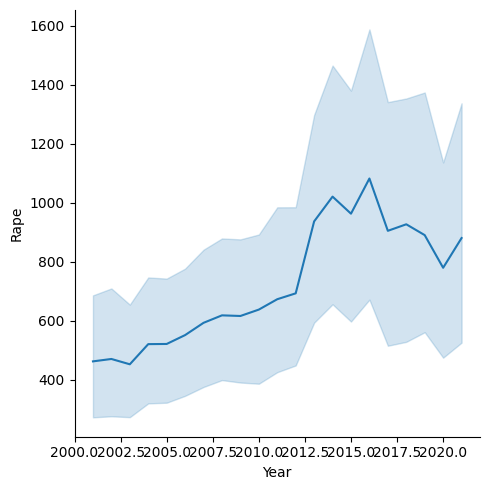

In [15]:
sns.relplot(data=df, x='Year', y="Rape", kind="line")


array([[<Axes: title={'center': 'Rape'}>,
        <Axes: title={'center': 'K&A'}>, <Axes: title={'center': 'DD'}>],
       [<Axes: title={'center': 'AoW'}>, <Axes: title={'center': 'AoM'}>,
        <Axes: title={'center': 'DV'}>],
       [<Axes: title={'center': 'WT'}>, <Axes: >, <Axes: >]], dtype=object)

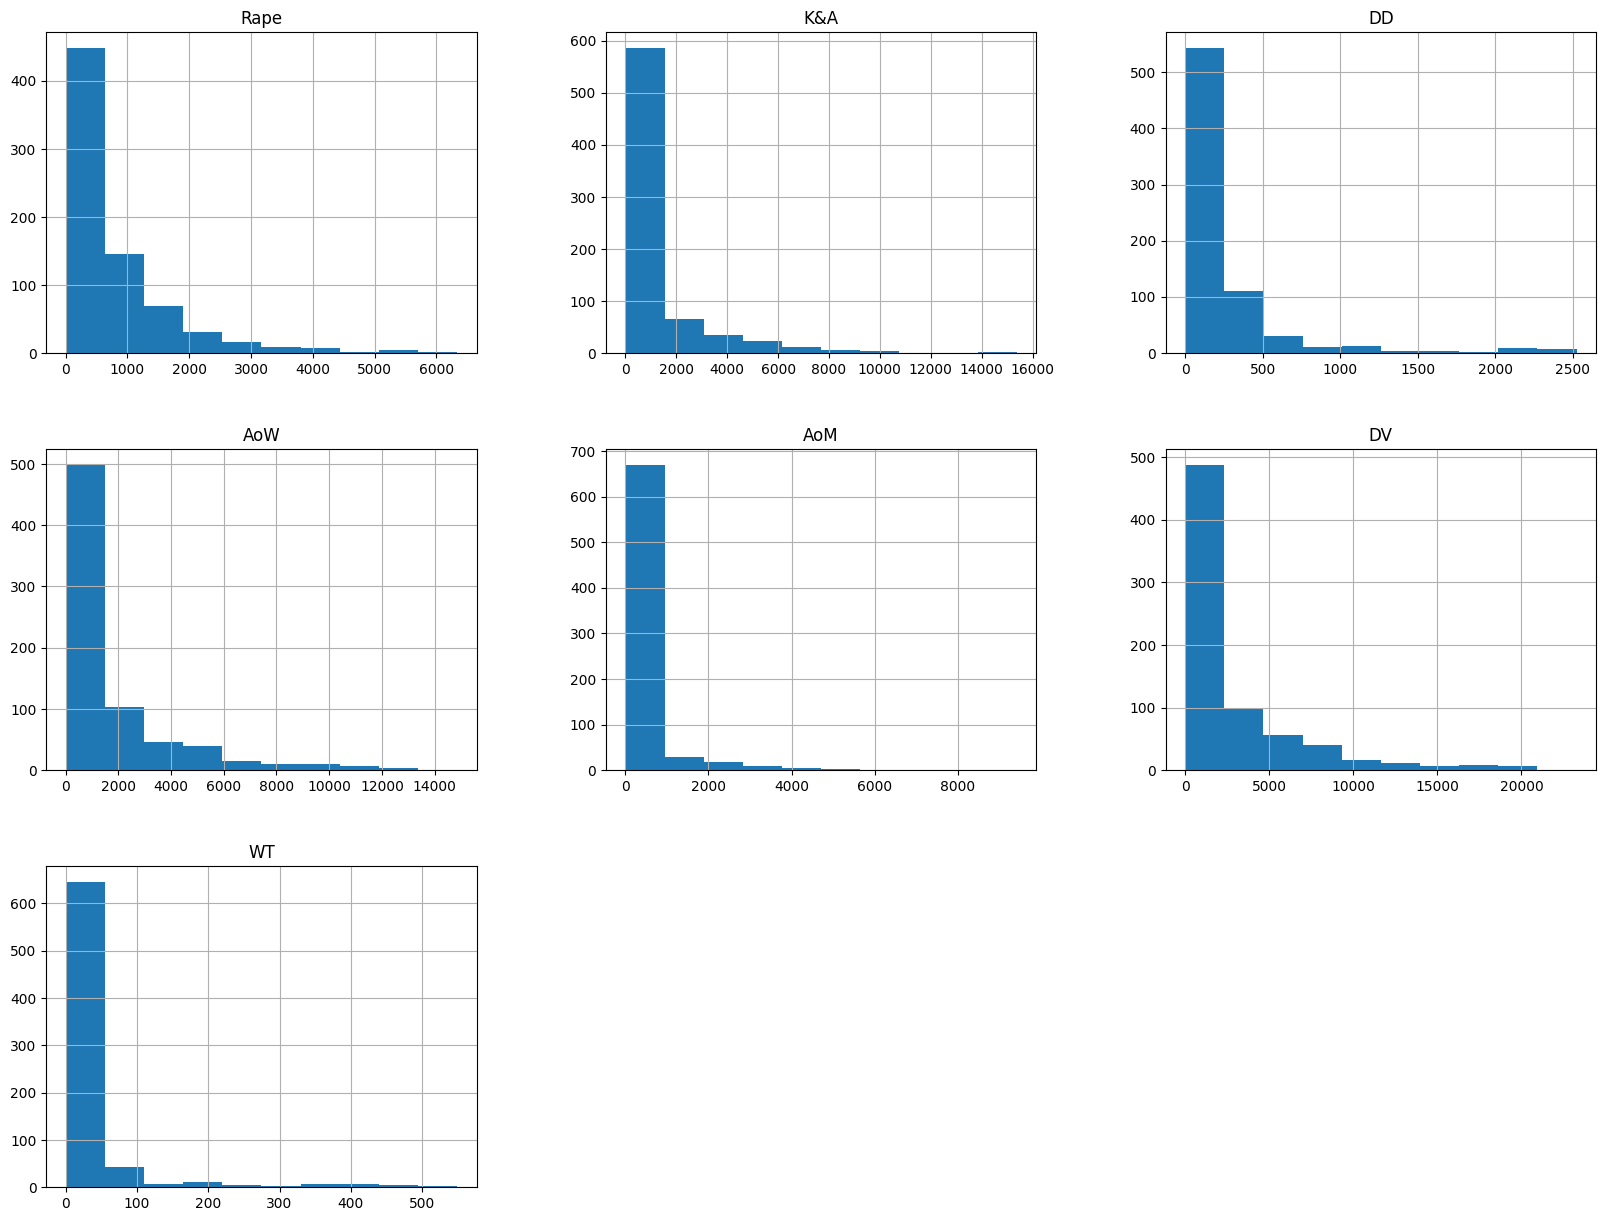

In [7]:
df.drop('Year', axis=1).hist()

In [8]:
df.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [10]:
df['State'].nunique()

70

In [23]:
df_year = df.drop('State', axis=1).groupby('Year').sum()
df_year

,Rape,K&A,DD,AoW,AoM,DV,WT
Year,,,,,,,
2001,15694,13681,6738,33622,9656,49032,114
2002,15970,13613,6687,33497,10027,49102,76
2003,15357,12499,6078,32450,12220,49492,46
2004,17682,14697,6900,33966,9871,56867,89
2005,17701,14644,6673,33413,9759,56995,148
2006,18725,16348,7481,35899,9822,61400,67
2007,20139,19249,7955,37866,10783,74143,61
2008,21001,21803,8043,39802,12084,79957,67
2009,20928,24086,8242,38159,10891,88263,48


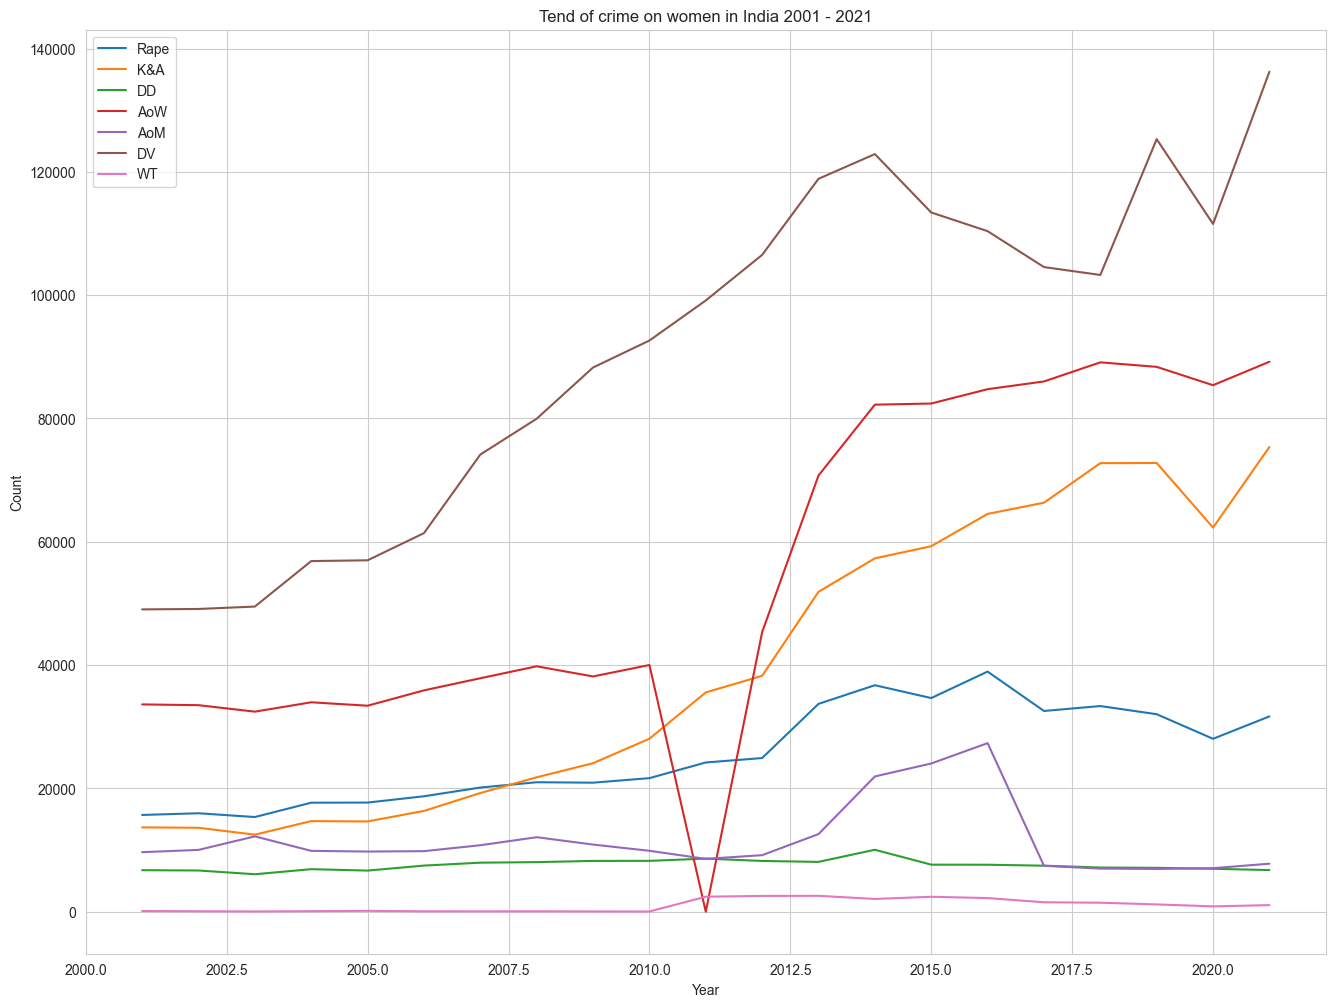

In [57]:
for name in df_year.columns:
    sns.lineplot(data=df_year, x='Year', y=name, label=name)

plt.title("Tend of crime on women in India 2001 - 2021")
plt.ylabel("Count")
plt.legend()

<Axes: >

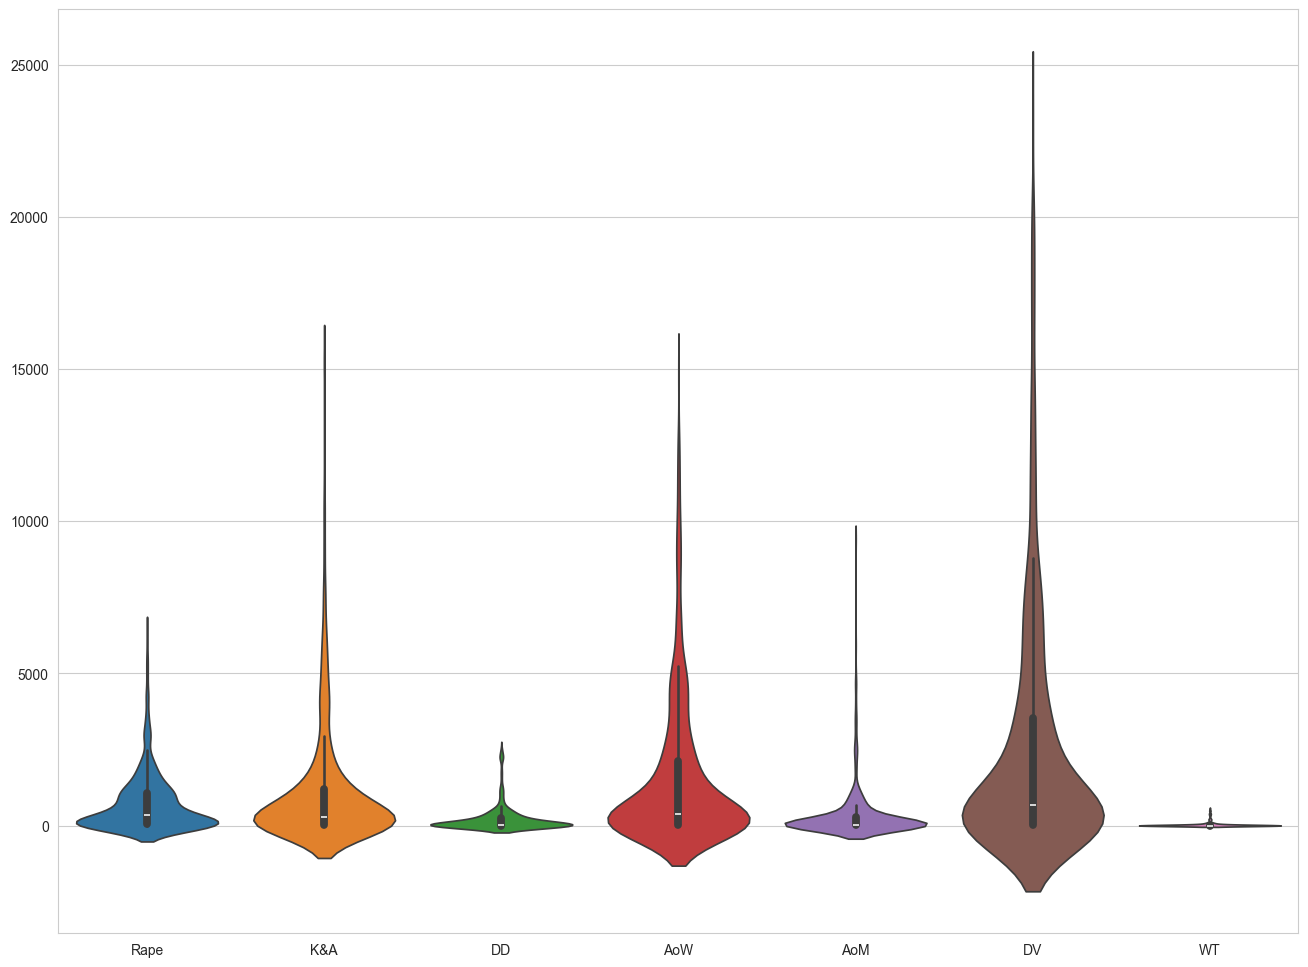

In [58]:
sns.violinplot(data=df.drop('Year', axis=1))

<Axes: >

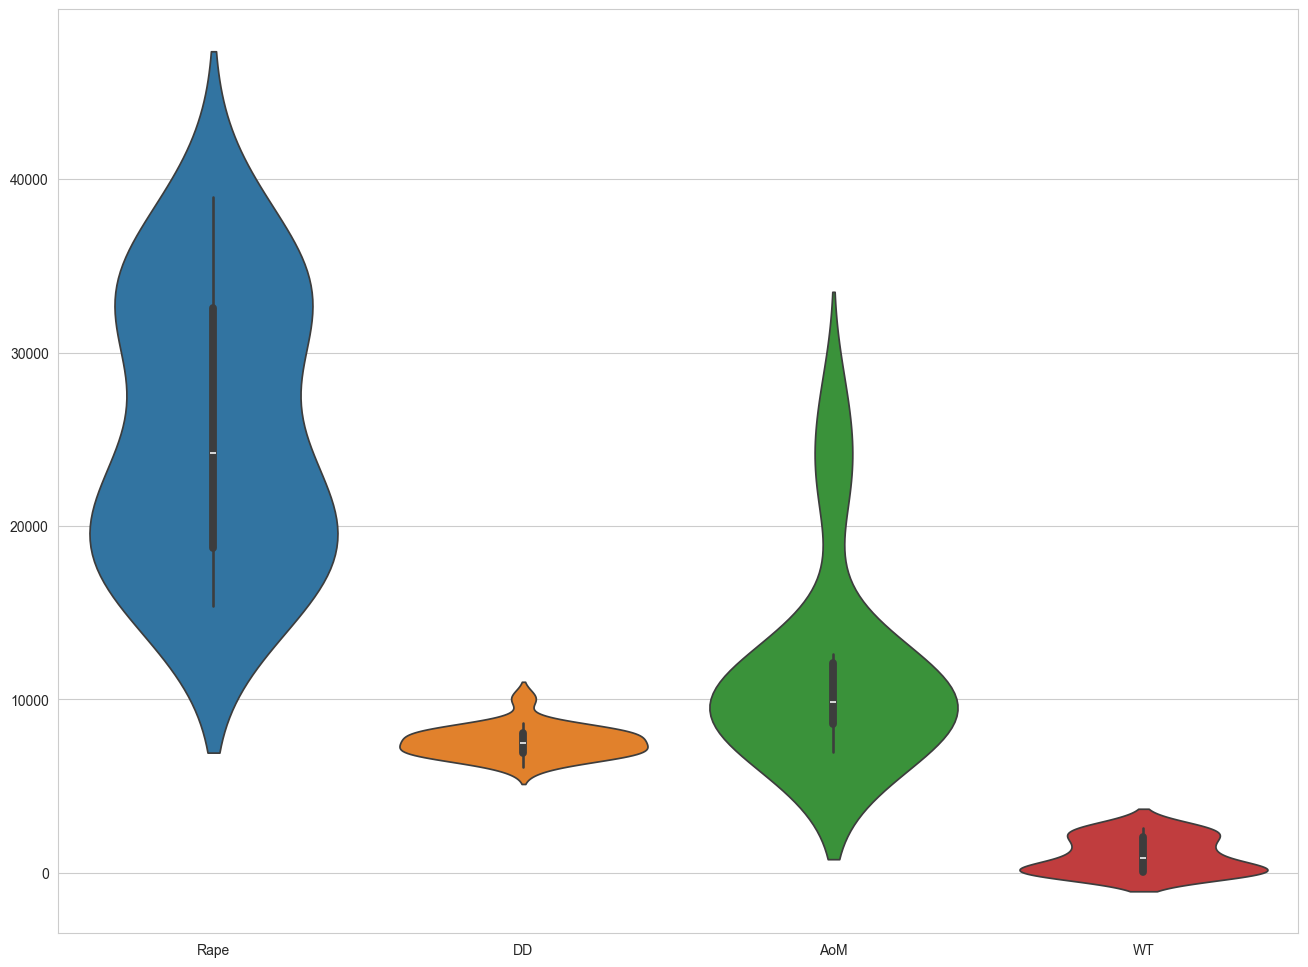

In [62]:
sns.violinplot(data=df_year.drop(['DV', 'AoW', 'K&A'], axis=1))

<Axes: >

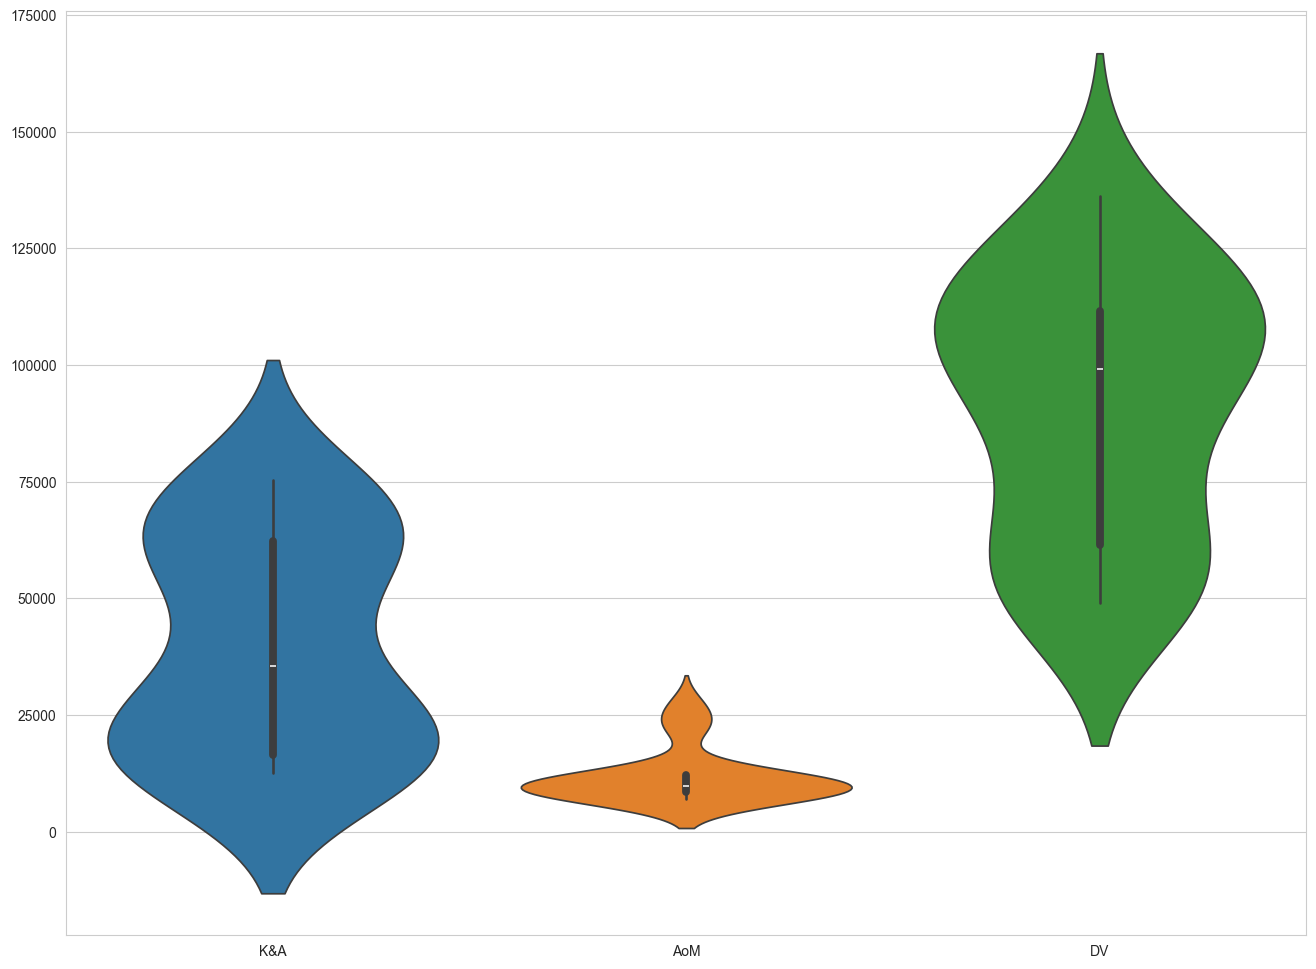

In [65]:
sns.violinplot(data=df_year.drop(['DD', 'Rape', 'AoW', 'WT'], axis=1))

<Axes: >

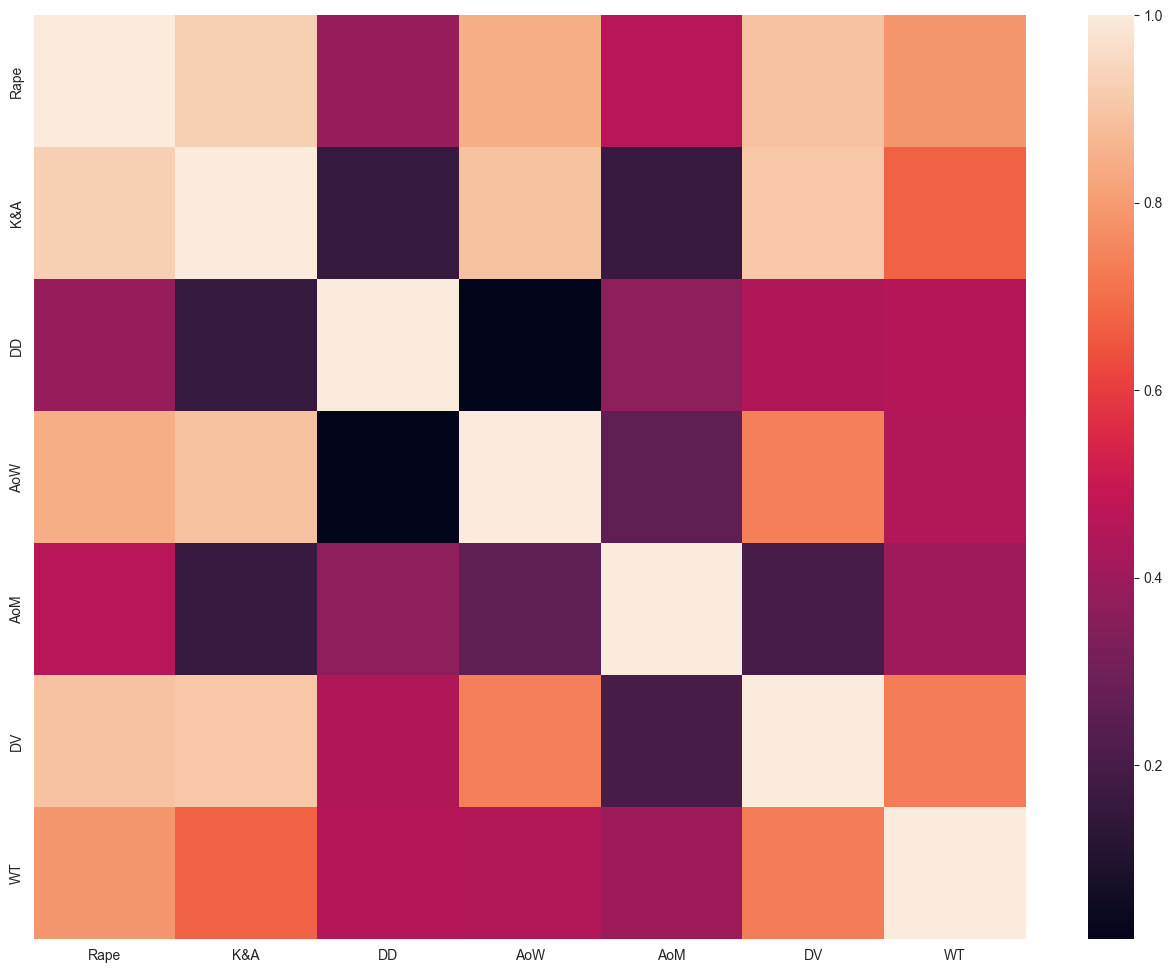

In [83]:
sns.heatmap(df_year.corr())

In [80]:
df_state = df.drop('Year', axis=1).groupby('State').sum()
df_state.head()

,Rape,K&A,DD,AoW,AoM,DV,WT
State,,,,,,,
A & N ISLANDS,84,58,4,182,36,111,0
A & N Islands,340,305,9,376,99,254,10
ANDHRA PRADESH,10696,11921,5112,42334,28759,92242,17
ARUNACHAL PRADESH,412,440,1,666,16,123,0
ASSAM,12762,16368,1015,10587,99,27735,4


In [81]:
df_state.describe()

,Rape,K&A,DD,AoW,AoM,DV,WT
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,7652.885714,11928.900000,2267.857143,16603.271429,3498.342857,27285.400000,302.228571
std,9024.608234,17792.214661,4007.131466,20881.450271,6516.194028,36089.302052,718.528794
min,7.000000,0.000000,0.000000,4.000000,0.000000,6.000000,0.000000
25%,637.000000,603.000000,19.250000,708.000000,99.000000,267.000000,1.000000
50%,5057.500000,5933.500000,796.000000,7719.000000,817.000000,9095.500000,13.000000
75%,12533.250000,14599.250000,2966.500000,23983.750000,3157.250000,43345.750000,310.500000
max,43552.000000,101701.000000,21357.000000,85442.000000,28759.000000,171204.000000,4026.000000


In [115]:
df["Total"] = df.sum(axis=1, numeric_only=True) - df['Year']

most_danger = df_state.sort_values(by=df_state.columns.to_list(), ascending=False)

df.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT,Total
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7,13669
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0,180
2,ASSAM,2001,817,1070,59,850,4,1248,0,4048
3,BIHAR,2001,888,518,859,562,21,1558,83,4489
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0,3964


In [129]:
df_state = df.drop('Year', axis=1).groupby('State').sum().sort_values(by=['Total'], ascending=False)

df_state.head()

,Rape,K&A,DD,AoW,AoM,DV,WT,Total
State,,,,,,,,
Uttar Pradesh,30641,101701,21357,76654,20024,100227,330,350934
West Bengal,13108,37848,4006,33851,4952,171204,838,265807
Madhya Pradesh,43552,50457,5834,85442,13850,63272,387,262794
Rajasthan,31850,36059,3695,41801,2038,126917,662,243022
Maharashtra,24806,38061,2175,76029,20948,67545,2531,232095


In [144]:
df_state.tail()

,Rape,K&A,DD,AoW,AoM,DV,WT,Total
State,,,,,,,,
NAGALAND,176,58,0,71,10,8,1,324
D & N HAVELI,49,77,1,46,4,35,0,212
DAMAN & DIU,14,13,3,15,2,30,0,77
Lakshadweep,13,0,0,19,11,11,0,54
LAKSHADWEEP,7,1,0,4,0,6,0,18


Text(30.440917107583758, 0.5, 'Total crimes')

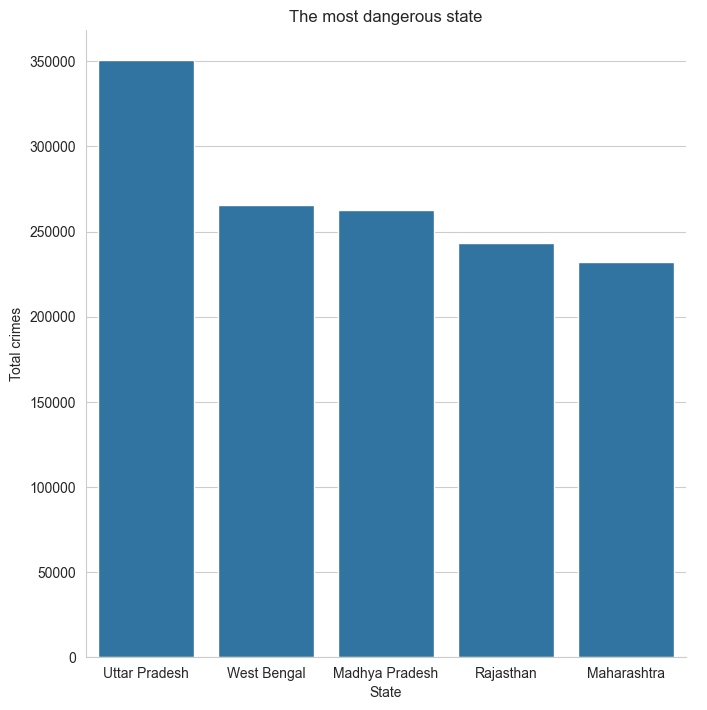

In [156]:
sns.catplot(data=df_state.head(), x='State', y='Total', kind='bar', height=7)
plt.title("The most dangerous state")
plt.ylabel('Total crimes')

Text(30.07186948853616, 0.5, 'Total crimes')

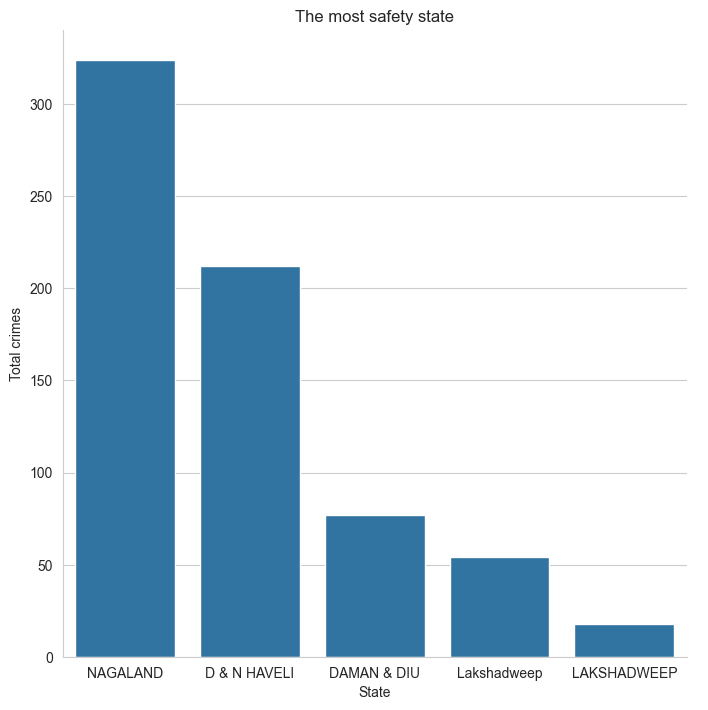

In [157]:
sns.catplot(data=df_state.tail(), x='State', y='Total', kind='bar', height=7)
plt.title("The most safety state")
plt.ylabel('Total crimes')

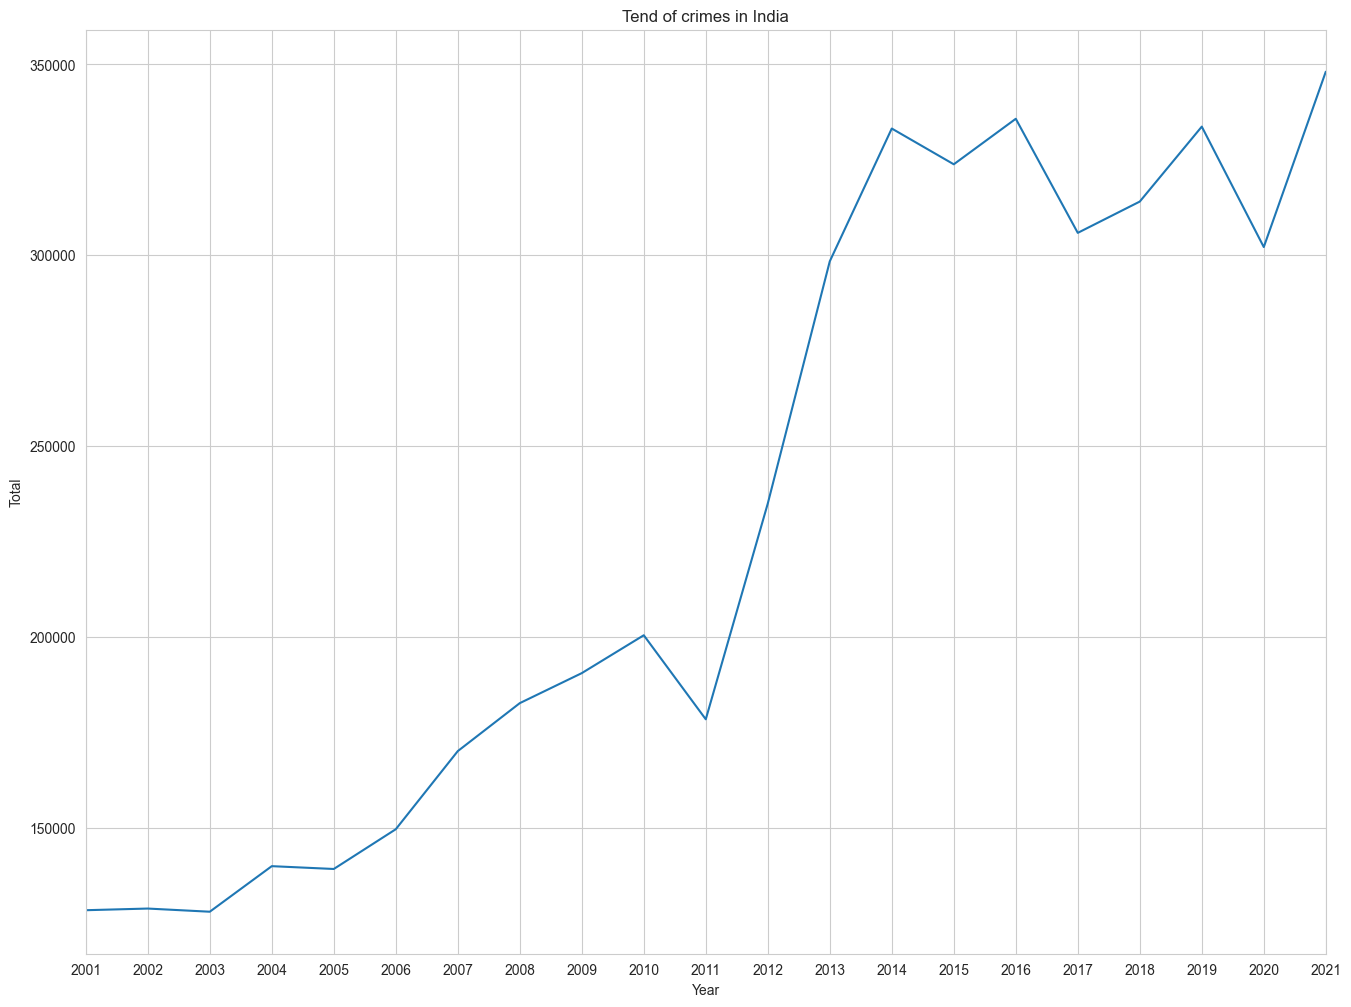

In [166]:
df_year = df.drop('State', axis=1).groupby('Year').sum()
sns.lineplot(data=df_year, x='Year', y='Total')
plt.title("Tend of crimes in India")
plt.xlim(2001, 2021)
plt.xticks(df['Year'].unique().tolist());

In [167]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(random_state=5)

repres = tsne.fit_transform(df.drop('State', axis=1))

CPU times: total: 2.89 s
Wall time: 5.66 s


# Хз если честно как интерпритировать данные снизу

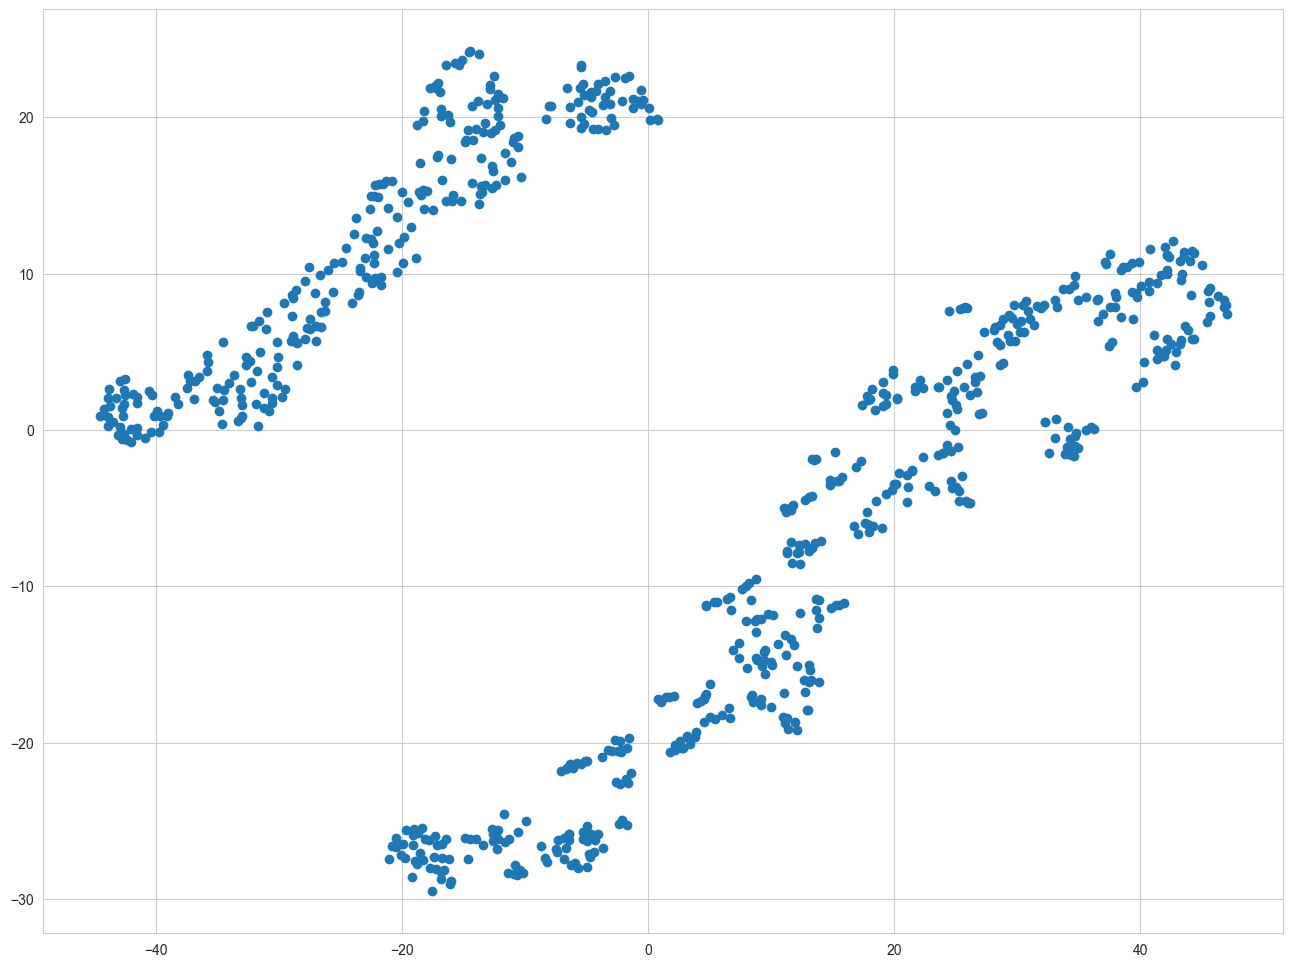

In [172]:
plt.scatter(repres[:, 0], repres[:, 1])